# Atividade prática

Dados os pontos da tabela:

| x | y |
| -- | -- |
10 | 227.04
15 | 362.78
20 | 517.35
22.5 | 602.97


2. Utilizando o método de Newton encontre os coeficientes do polinômio interpolador de ordem 3. Trace o gráfico entre 10 e 22.5 com intervalo de 0.01 entre os pontos 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([10,15,20,22.5])
y = np.array([227.04, 362.78, 517.35, 602.97])

In [3]:
def ddn(x,y):
    if x.shape[0]==1:
        return y[0]
    else:
        return (ddn(x[1:],y[1:]) - ddn(x[:-1],y[:-1]))/(x[-1]-x[0])

In [4]:
b = ddn(x,y)
b

0.005434666666666525

In [5]:
def coeficientes(x,y):
    coef = np.zeros(x.shape[0])
    for i in range(len(coef)):
        coef[i] = ddn(x[:i+1],y[:i+1])
    return coef

In [6]:
b = coeficientes(x,y)
b

array([2.27040000e+02, 2.71480000e+01, 3.76600000e-01, 5.43466667e-03])

In [7]:
def polinomio(x,xo,b):
    y = b[0]
    for i in range(1,len(b)):
        termos = 1
        for j in range(i):
            termos*=(x - xo[j])
        y+=b[i]*termos
    return y 

In [8]:
yn = polinomio(x,x,b)
yn

array([227.04, 362.78, 517.35, 602.97])

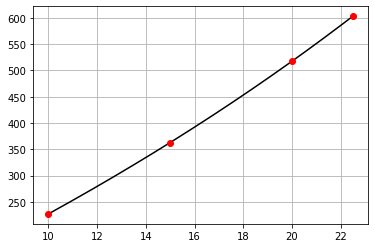

In [9]:
xi = np.arange(10,22.5,0.01)
yi = polinomio(xi,x,b)

plt.plot(xi,yi,'k-',
        x,y,'ro')
plt.grid(True)